<a href="https://colab.research.google.com/github/zia207/r-colab/blob/main/NoteBook/Advance_Regression/glm_logistic_r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](http://drive.google.com/uc?export=view&id=1bLQ3nhDbZrCCqy_WCxxckOne2lgVvn3l)

# GLM Model with a Binary Response Variable (Logistic Regression)





## Introdduction

Logistic regression is a statistical method useful in scenarios where the categorical outcome variable has only two possible classes. It is a binary classification method that predicts the probability of an instance belonging to a particular category or class. The method derives its name from its use of the logistic function to model the probability of a given class.

Logistic regression falls under the category of supervised learning. This means that it makes predictions based on labeled data. The method is widely used in various fields, such as finance, healthcare, and marketing. Logistic regression is particularly useful in analyzing datasets with many variables and can be used to identify significant variables that influence the outcome variable.

Despite its name, logistic regression is not used for regression but rather for classification. It is a powerful tool that can help businesses and researchers make informed decisions based on the probability of an event occurring.

Here are the key concepts and components of logistic regression:

1.  **Sigmoid Function (Logistic Function):** The logistic regression model uses the sigmoid function to map any real-valued number into a value between 0 and 1. The sigmoid function is defined as:

$$ \sigma(z) = \frac{1}{1 + e^{-z}} $$

where $z$ is a linear combination of the input features and their corresponding weights.

2.  **Linear Combination:** The linear combination $z$ is given by:

$$ z = b + w_1x_1 + w_2x_2 + \ldots + w_nx_n $$

Here, $b$ is the bias term, $w_i$ are the weights associated with each feature $x_i$, and $n$ is the number of features.

3.  **Probability Prediction:** The output of the logistic regression model is the probability that a given input belongs to a particular class. The sigmoid function ensures that the output is bounded between 0 and 1.

$$ P(Y=1) = \sigma(z) $$ $$ P(Y=0) = 1 - \sigma(z) $$

4.  **Decision Boundary:** A decision boundary is a threshold used to classify instances into one of the two classes. If the predicted probability is above the threshold, the instance is assigned to class 1; otherwise, it is assigned to class 0.

5.  **Cost Function (Log Loss):** The logistic regression model is trained by minimizing a cost function, typically the log loss (cross-entropy) function. The goal is to find the set of weights and bias that minimizes the difference between the predicted probabilities and the actual class labels in the training data. Given a set of observations with binary outcomes (0 or 1), the log loss for a single observation is defined as:

$$ J(w,b) = -\frac{1}{m} \sum_{i=1}^{m} [y^{(i)} \log(\hat{y}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{y}^{(i)})] $$

where $m$ is the number of training examples, $y^{(i)}$ is the true label for the i-th example, and $\hat{y}^{(i)}$ is the predicted probability of class 1 for the i-th example.

Logistic regression is widely used in various fields, including medicine, finance, and social sciences, for binary classification problems. It can be extended to handle multiclass classification through techniques such as one-vs-rest or one-vs-one.

## Install rpy2

In [ ]:
!pip uninstall rpy2 -y
!pip install rpy2==3.5.1
%load_ext rpy2.ipython

## Mount Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Check and Install required R Packages

In [ ]:
%%R
pkg <- c('tidyverse',
         'tidymodels',
         'caret',
         'broom',
         'report',
         'stargazer',
         'performance',
         'jtools',
         'relaimpo',
         'ggpmisc',
         'see',
         'Metrics',
         'flextable',
         'gt',
         'rstatix',
         'RColorBrewer',
         'pROC',
         'ROCR'
         )
new.packages <- pkg[!(pkg %in% installed.packages(lib='drive/My Drive/R/')[,"Package"])]
if(length(new.packages)) install.packages(new.packages, lib='drive/My Drive/R/')


## Load packages

In [ ]:
%%R
# set library path
.libPaths('drive/My Drive/R')
library(tidyverse)
library(broom)
library(stargazer)
library(report)
library(performance)
library(Metrics)
library(ggpmisc)
library(jtools)
library(relaimpo)
library(flextable)
library(gt)
library(plyr)
library(patchwork)
library(ggpmisc)
library(pROC)
library(caret)
library(ROCR)

## Data

Our goal is to develop a GLM regression model to predict paddy soil arsenic (`SAs`) concentration using various irrigation water and soil properties. We have available data of 263 paired groundwater and paddy soil samples from arsenic contaminated areas in Tala Upazilla, Satkhira district, Bangladesh. This data was utilized in a publication titled "Factors Affecting Paddy Soil Arsenic Concentration in Bangladesh: Prediction and Uncertainty of Geostatistical Risk Mapping" which can be accessed via the this [URL](https://doi.org/10.1016/j.scitotenv.2011.10.008)

We used this data set for [Assessing soil carbon vulnerability in the Western USA by geospatial modeling of pyrogenic and particulate carbon stocks](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1002/2016JG003488).

Full data set is available for download can download from my [Dropbox](https://www.dropbox.com/scl/fo/2rh6r68i9cxmgortvbw8q/h?rlkey=bvntt66n9mcywprmdki08ch3r&dl=0) or from my [Github](https://github.com/zia207/r-colab/tree/main/Data/Regression_analysis) accounts.

We will use `read_csv()` function of **readr** package to import data as a **tidy** data.

In [6]:
%%R
mf<-read_csv("https://github.com/zia207/r-colab/raw/main/Data/Regression_analysis/bd_soil_arsenic.csv")
meta.as<-read_csv("https://github.com/zia207/r-colab/raw/main/Data/Regression_analysis/bd_soil_arsenic_meta_data.csv")

Rows: 263 Columns: 29
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): Land_type
dbl (28): ID, Longitude, Latitude, WAs, WP, WFe, WEc, WpH, WMg, WNa, WCa, WK...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 26 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): Variables, Description

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [ ]:
%%R
meta.as

# A tibble: 26 × 2
   Variables Description              
   <chr>     <chr>                    
 1 WAs       Irrigation water  Arsenic
 2 WP        Irrigation water P       
 3 WFe       Irrigation water  Fe     
 4 WEc       Irrigation water Ec      
 5 WpH       Irrigation water  pH     
 6 WMg       Irrigation water  Mg     
 7 WNa       Irrigation water Na      
 8 WCa       Irrigation water  Ca     
 9 WK        Irrigation water K       
10 WS        Irrigation water  S      
# ℹ 16 more rows
# ℹ Use `print(n = ...)` to see more rows


## Create a binary response variable

The `binary class` typically refers to a classification problem where there are only two possible classes or outcomes. As we see `SAs` is a continuous variable, but we need to convert it into binary class (contaminated and non-contaminated) based on our published paper. The paper suggests that we use the probability of exceeding the upper baseline soil arsenic concentration (14.8 mg/kg) to define soil samples as either As contaminated (`Yes`) or non-contaminated (`No`).

Here we will convert `Soil As (SAs)` into two classes- `Yes = Contaminated`and `No = noncontaminated` and create a new binary response variables (`Class_As`) with two levels:

Yes = `SAs` \> 14.8 mg As/kg

No = `SAs` \< 14.8 mg As/kg

In [7]:
%%R
mf$Class_As<- cut(mf$SAs,
                   breaks=c(-Inf, 14.8, Inf),
                   labels=c("No", "Yes"))
mf$Class_As<-as.factor(mf$Class_As)

## Feature Engineering

Feature engineering is a vital task in the data preparation process for data analysis, particularly for machine learning models. It creates new features from ones or transforms them to enhance the machine learning algorithm's performance. Doing so makes achieving higher accuracy, better generalization, and a more straightforward interpretation of the model possible. Some standard techniques used in feature engineering include dimensionality reduction, feature scaling, and feature extraction. When performing feature engineering, it is essential to consider the data type, distribution, and target variable, among other factors.

We will apply following operation before fit a GLM regression model.

1.  create a new features: We will create a new feature (Sand_Silt) by adding soil Silt and Sand percentage

2.  Convert to factors: As Land_type is categorical variable representing distinct categories rather than numerical values, we need to convert them into factors. This process will allow us to analyze and interpret the data more accurately, facilitating a better understanding of the underlying patterns and trends.

In [8]:
%%R
df <- mf |>
  # select variables
  dplyr::select (WAs, WP, WFe,
                WEc, WpH, SPAs, SAoFe, SpH, SOC,
                Sand, Silt, SP, Elevation,
                Year_Irrigation, Diastance_STW,
                Land_type, Class_As) |>
   # convert to factor
   dplyr::mutate_at(vars(Land_type), funs(factor))  |>
   dplyr::mutate_at(vars(Class_As), funs(factor))  |>
   # create a variable
   dplyr::mutate (Silt_Sand = Silt+Sand)  |>
   # drop two variables
   dplyr::select(-c(Silt,Sand)) |>
   # relocate or organized variable
   dplyr::relocate(Class_As, .after=Silt_Sand) |>
   dplyr::relocate(Land_type, .after=Silt_Sand) |>
   # normalize the all numerical features
   dplyr::mutate_at(1:14,  funs((.-min(.))/max(.-min(.)))) |>
   glimpse()

Rows: 263
Columns: 16
$ WAs             <dbl> 0.10738255, 0.10738255, 0.15212528, 0.24832215, 0.1364…
$ WP              <dbl> 0.21949255, 0.39387837, 0.44341522, 0.53523963, 0.3020…
$ WFe             <dbl> 0.1804348, 0.3423913, 0.8608696, 0.7391304, 0.3260870,…
$ WEc             <dbl> 0.16976127, 0.18037135, 0.26790451, 0.11671088, 0.2732…
$ WpH             <dbl> 0.4591837, 0.4897959, 0.2653061, 0.2755102, 0.3775510,…
$ SPAs            <dbl> 0.649625668, 0.707379679, 0.362923351, 0.374474153, 0.…
$ SAoFe           <dbl> 0.3807107, 0.4238579, 0.2944162, 0.3807107, 0.2690355,…
$ SpH             <dbl> 0.5529954, 0.6129032, 0.6866359, 0.7050691, 0.5852535,…
$ SOC             <dbl> 0.5333333, 0.3428571, 0.3904762, 0.5095238, 0.3428571,…
$ SP              <dbl> 0.2277923, 0.2582715, 0.2628835, 0.2777221, 0.2360136,…
$ Elevation       <dbl> 0.250, 0.500, 0.375, 0.250, 0.500, 0.125, 0.125, 0.250…
$ Year_Irrigation <dbl> 0.68421053, 1.00000000, 0.47368421, 0.36842105, 0.4736…
$ Diastance_STW   

### Split data to training and test

We will use the `ddply()` function of the **plyr** package to split soil carbon datainto homogeneous subgroups using **stratified random sampling**. This method involves dividing the population into strata and taking random samples from each stratum to ensure that each subgroup is proportionally represented in the sample. The goal is to obtain a representative sample of the population by adequately representing each stratum.


In [9]:
%%R
seeds = 11076
tr_prop = 0.70
# training data (70% data)
train= ddply(df,.(Land_type, Class_As),
                 function(., seed) { set.seed(seed); .[sample(1:nrow(.), trunc(nrow(.) * tr_prop)), ] }, seed = 101)
test = ddply(df, .(Land_type, Class_As),
            function(., seed) { set.seed(seed); .[-sample(1:nrow(.), trunc(nrow(.) * tr_prop)), ] }, seed = 101)

Stratified random sampling is a technique for selecting a representative sample from a population, where the sample is chosen in a way that ensures that certain subgroups within the population are adequately represented in the sample.

In [10]:
%%R
print(prop.table(table(train$Class_As)))
print(prop.table(table(test$Class_As)))


       No       Yes 
0.3551913 0.6448087 

  No  Yes 
0.35 0.65 


## Fit a Logistic model

We will use **logistic regression** to predict probability of soil As contamination (`Bi_Class_As`) based on elevation, year of irrigation, distance from STW, several irrigation water, and soil properties.


In [11]:
%%R
binom.glm<-glm(Class_As~., data= train,
             family=binomial())

### Model Summary

The `summary()` function provides a summary of the fitted GLM model, including coefficients, standard errors, t-values, and p-values, among other statistics. This summary can help you interpret the relationship between the predictors and the response variable.

In [12]:
%%R
summary(binom.glm)


Call:
glm(formula = Class_As ~ ., family = binomial(), data = train)

Coefficients:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)     -18.4909     6.3258  -2.923 0.003466 ** 
WAs              -0.4236     3.3794  -0.125 0.900241    
WP               -0.6752     2.6184  -0.258 0.796500    
WFe               7.0615     2.6803   2.635 0.008423 ** 
WEc               5.2968     1.9767   2.680 0.007370 ** 
WpH               4.4795     3.3682   1.330 0.183537    
SPAs             45.7385    11.6567   3.924 8.72e-05 ***
SAoFe             4.7727     2.7987   1.705 0.088133 .  
SpH               6.7700     3.2379   2.091 0.036540 *  
SOC              -1.8407     3.1364  -0.587 0.557272    
SP                0.4601     4.9736   0.093 0.926299    
Elevation        -9.2409     3.6181  -2.554 0.010646 *  
Year_Irrigation   8.2526     2.4263   3.401 0.000671 ***
Diastance_STW    -4.4892     3.2809  -1.368 0.171216    
Silt_Sand         1.9182     2.8888   0.664 0.506685    
Lan

The summary output of GLM has several components that provide valuable insights into the model's performance. The summary includes information on the call, residuals, and coefficients, which are analogous to the summary of a model fit using the `lm()` function. However, the GLM summary differs from the `lm()` function in providing additional information about the dispersion parameter and deviance values.

The **intercept** represents the `log-odds` of the event happening when all independent variables are set to zero. In some cases, interpreting the intercept might not be meaningful, especially if setting all variables to zero is not a realistic or meaningful scenario in your context.

Each **slope coefficient** represents the change in the `log-odd`s of the event happening for a one-unit change in the corresponding independent variable holding all other variables constant. If the slope is positive, an increase in the corresponding independent variable is associated with an increase in the log-odds of the event happening. If the slope is negative, an increase in the corresponding independent variable is associated with a decrease in the log-odds of the event happening.

The **dispersion parameter** is a scaling factor that accounts for the variance of the response variable and is a crucial component of the GLM models. The deviance values are measures of the model's goodness of fit and are used to assess how well the model fits the observed data.

In cases where quasi-family is not used, the dispersion value is set to 1. This value indicates that the model's variance equals the mean and performs adequately. By understanding the summary output of a GLM model, we can make informed decisions about the model's performance and take the necessary steps to improve its accuracy.

We can use `reoprt()` function of **report** package to further explain the `binom.glm` object.



In [16]:
%%R
report(binom.glm)

We fitted a logistic model (estimated using ML) to predict Class_As with WAs,
WP, WFe, WEc, WpH, SPAs, SAoFe, SpH, SOC, SP, Elevation, Year_Irrigation,
Diastance_STW, Silt_Sand and Land_type (formula: Class_As ~ WAs + WP + WFe +
WEc + WpH + SPAs + SAoFe + SpH + SOC + SP + Elevation + Year_Irrigation +
Diastance_STW + Silt_Sand + Land_type). The model's explanatory power is
substantial (Tjur's R2 = 0.78). The model's intercept, corresponding to WAs =
0, WP = 0, WFe = 0, WEc = 0, WpH = 0, SPAs = 0, SAoFe = 0, SpH = 0, SOC = 0, SP
= 0, Elevation = 0, Year_Irrigation = 0, Diastance_STW = 0, Silt_Sand = 0 and
Land_type = HL, is at -18.49 (95% CI [-32.93, -7.46], p = 0.003). Within this
model:

  - The effect of WAs is statistically non-significant and negative (beta =
-0.42, 95% CI [-7.12, 6.30], p = 0.900; Std. beta = -0.08, 95% CI [-1.33,
1.18])
  - The effect of WP is statistically non-significant and negative (beta = -0.68,
95% CI [-6.07, 4.40], p = 0.797; Std. beta = -0.10, 95% CI [-0.

### Model Performance

In [17]:
%%R
performance::performance(binom.glm)

# Indices of model performance

AIC    |   AICc |     BIC | Tjur's R2 |  RMSE | Sigma | Log_loss | Score_log | Score_spherical |   PCP
------------------------------------------------------------------------------------------------------
91.386 | 94.663 | 142.738 |     0.776 | 0.226 | 1.000 |    0.162 |      -Inf |           0.031 | 0.898


**`Tjur's R²`**, also known as Tjur's coefficient of discrimination, is a measure of discrimination or predictive accuracy for binary outcomes in logistic regression. It assesses how well the model distinguishes between the two categories of the dependent variable. Tjur's R² is defined as the difference in the average predicted probabilities of the two outcomes.

The formula for Tjur's R² is as follows:

$$ R^2_{Tjur} = P(Y=1|\hat{Y}=1) - P(Y=0|\hat{Y}=1) $$

Here:

-   $P(Y=1|\hat{Y}=1)$ is the probability of the actual outcome being 1 given that the predicted outcome is 1.

-   $P(Y=0|\hat{Y}=1)$ is the probability of the actual outcome being 0 given that the predicted outcome is 1.

Tjur's R² ranges from -1 to 1, where a higher value indicates better discrimination. A positive value suggests that the model is better at predicting the positive class, while a negative value suggests better prediction for the negative class.

In practice, Tjur's R² is not as commonly used as other metrics like the area under the ROC curve (AUC) or the Brier score, but it provides a measure of the practical significance of the logistic regression model in terms of discrimination. Keep in mind that the interpretation of Tjur's R² should be done in the context of the specific dataset and problem you are working on.

**`Log_loss`**: Logarithmic Loss (Log Loss), also known as cross-entropy loss, is a commonly utilized loss function in machine learning, particularly in classification problems. It measures the performance of a classification model that outputs a probability value ranging from 0 to 1. Due to its versatility and capability to handle prediction errors, Logarithmic Loss is often preferred over alternative loss functions. Its formulation is mathematically rigorous, and its implementation is straightforward, making it an essential tool for any machine learning practitioner.

The formula for Log Loss is:

$$ {Log Loss} = -\frac{1}{N} \sum_{i=1}^{N} [y_i \log(p_i) + (1 - y_i) \log(1 - p_i)] $$

Where:

\- $N$ is the number of samples in the dataset.

\- $y_i$ is the true label for the $i$ th sample (0 or 1 for binary classification, or one-hot encoded vectors for multiclass classification).

-   $p_i$ is the predicted probability that the $i$ th sample belongs to the positive class.

**`Score_spherical`**: A proper scoring rule is a mathematical function used to assess the accuracy of probabilistic predictions made by a model. It is called proper because it is designed to maximize the expected score when the model's predictions align with the actual probabilities of the outcomes.

**`PCP`**: Percentage of Correct Predictions (PCP), also known as accuracy, is a common evaluation metric for models with binary outcomes. It measures the proportion of correctly predicted instances out of the total number of instances.
:::

### The Logistic Distribution of Intercept and Slopes

The `plogis()` function is used to calculate the logistic cumulative distribution function (CDF) of Intercept and Slopes. The logistic CDF is the probability that a logistic random variable is less than or equal to a specified value. The `plogis()` function takes a numeric vector of values and returns the corresponding probabilities.

The `plogis()` function is particularly useful in the context of logistic regression, where you might be interested in converting log-odds into probabilities. If you have a logistic regression model with coefficients (intercept and slopes), you can use the logistic function and `plogis` to calculate probabilities.

In [18]:
%%R
## Intercept
intercept = coef(binom.glm)[1]
# Back-transform the  Slope of WAs
slop_was = coef(binom.glm)[2]
log_odds<-intercept + (slop_was*train$WAs)
probabilities <- plogis(log_odds)
age.prob<-data.frame(WAs = train$WAs, LogOdds = log_odds, Probability = probabilities) |>
  glimpse()

Rows: 183
Columns: 3
$ WAs         <dbl> 0.01789709, 0.07158837, 0.05816555, 0.25727069, 0.01789709…
$ LogOdds     <dbl> -18.49847, -18.52121, -18.51552, -18.59987, -18.49847, -18…
$ Probability <dbl> 9.251633e-09, 9.043575e-09, 9.095147e-09, 8.359455e-09, 9.…


### Visualization of model assumptions

The package **performance** provides many functions to check model assumptions, like `check_collinearity()`, `check_normality()` or `check_heteroscedasticity()`. To get a comprehensive check, use `check_model()`.

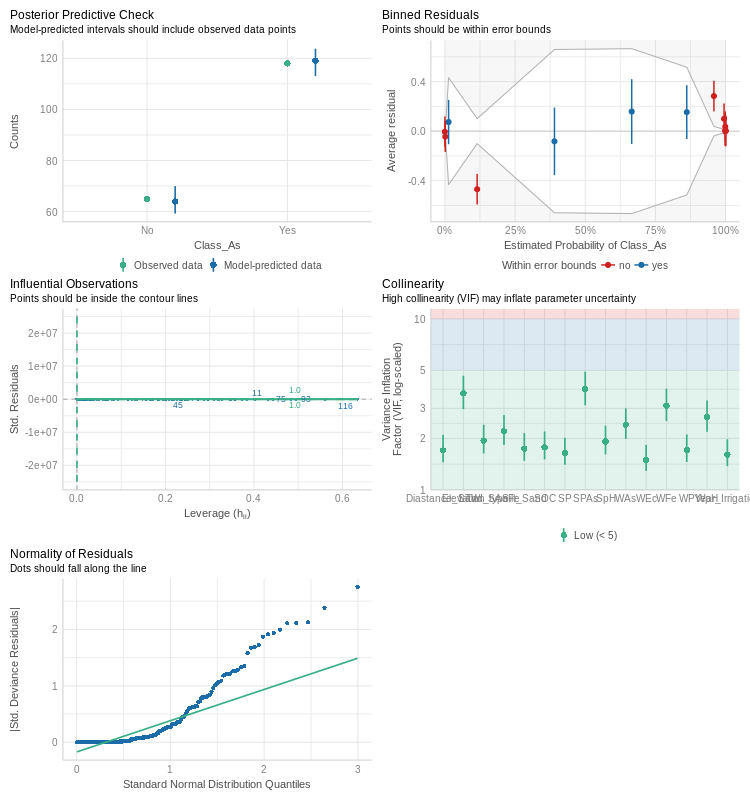

In [19]:
%%R -w 750 -h 800 -u px
performance::check_model(binom.glm)

### Regression Model visualization by jtools

The “jtools” package consists of a series of functions to automate visualization regression model.


In [20]:
%%R
jtools::summ(binom.glm)

MODEL INFO:
Observations: 183
Dependent Variable: Class_As
Type: Generalized linear model
  Family: binomial 
  Link function: logit 

MODEL FIT:
χ²(15) = 178.73, p = 0.00
Pseudo-R² (Cragg-Uhler) = 0.86
Pseudo-R² (McFadden) = 0.75
AIC = 91.39, BIC = 142.74 

Standard errors: MLE
------------------------------------------------------
                          Est.    S.E.   z val.      p
--------------------- -------- ------- -------- ------
(Intercept)             -18.49    6.33    -2.92   0.00
WAs                      -0.42    3.38    -0.13   0.90
WP                       -0.68    2.62    -0.26   0.80
WFe                       7.06    2.68     2.63   0.01
WEc                       5.30    1.98     2.68   0.01
WpH                       4.48    3.37     1.33   0.18
SPAs                     45.74   11.66     3.92   0.00
SAoFe                     4.77    2.80     1.71   0.09
SpH                       6.77    3.24     2.09   0.04
SOC                      -1.84    3.14    -0.59   0.56
SP   

### Prediction at test locations



#### Prediction

The `predict()` function will be used to predict the amount of SOC present in the testing locations. This will help to validate the accuracy of the GLM regression model.

In [25]:
%%R
# setting the cut-off probability
test$Pred.prob<-predict(binom.glm, test, type = "response")

#### Confusion Matrix at 50% Cut-Off Probability

Now, we classified an sites in the test data set with a probability of As contamination is greater than 0.5, as `Yes`, otherwise `No`.

In [26]:
%%R
# setting the cut-off probability
test$Class_Prob <- ifelse(test$Pred.prob > 0.5,"Yes","No")

Then, we will order the both actual (`Class_As`) and predicted classes (`Class_Prob`):

In [28]:
%%R
# ordering the levels
test$Class_Prob <- ordered(test$Class_Prob, levels = c("Yes", "No"))
test$Class_As <- ordered(test$Class_As , levels = c("Yes", "No"))

#### Prediction Performance






#### Overall classification accuracy

Classification accuracy is a commonly used metric to evaluate the performance of a classification model. This metric is critical in machine learning applications where the model must predict a particular class or category based on input features. The classification accuracy represents the proportion of correct predictions made by the model to the total number of predictions it made. This metric is usually expressed as a percentage. For example, if a model makes 100 predictions and 80 of them are correct, the classification accuracy would be 80%.

The formula used to calculate classification accuracy is straightforward. It is simply the ratio of the number of correct predictions to the total number of predictions made by the model, expressed as a percentage. The higher the classification accuracy, the better the performance of the model. Conversely, a lower classification accuracy indicates that the model made more incorrect predictions.

$$ {Accuracy} = \frac{\text{Number of Correct Predictions}}{\text{Total Number of Predictions}} \times 100\% $$

The accuracy metric measures how often a model correctly predicts class labels. However, accuracy might not be the best way to evaluate a model's performance, especially if the dataset is imbalanced or misclassification errors have different costs. In such cases, other metrics like `precision`, `recall`, `F1-score`, or `area under the ROC curve (AUC-ROC)` might provide a more comprehensive understanding of the model's performance

In [29]:
%%R
accuracy <- mean(test$Class_As  == test$Class_Prob)
accuracy

[1] 0.8


The classification `error rate` is the percentage of observations that have been misclassified. It can be calculated by subtracting the accuracy from 1. The accuracy and error rate can be calculated by comparing the observed classes in the test data against the predicted classes by the model.


In [30]:
%%R
error <- mean(test$Class_As != test$Class_Prob)
error

[1] 0.2


#### Confusion matrix

A logistic model can make two types of errors while categorizing a site concerning As-contamination. Firstly, it can wrongly assign an As-contamination-positive site to the As-contamination-negative category. Secondly, it can wrongly assign an As-contamination-negative individual to the As-contamination-positive category.

A **confusion matrix** needs to be created to determine the proportion of these errors. This matrix helps compare the predicted outcome values against the known outcome values. It compares the observed and the predicted outcome values and shows the number of correct and incorrect predictions categorized by type of outcome. The confusion matrix is organized into rows and columns. The rows represent the actual classes, while the columns represent the predicted classes. Each cell in the matrix represents the count (or proportion) of instances that belong to the actual class and were predicted to be in the predicted class.

![alt text](http://drive.google.com/uc?export=view&id=1b-mfVANB-v7OXCpUuEN7GrMBrNRW66__)


True Positive (TP) refers to instances that are actually positive and are correctly predicted as positive. False Negative (FN) refers to instances that are actually positive but are incorrectly predicted as negative. False Positive (FP) refers to instances that are actually negative but are incorrectly predicted as positive. True Negative (TN) refers to instances that are actually negative and are correctly predicted as negative.

The R function `table()` can produce a confusion matrix to determine how many observations were correctly or incorrectly classified.


In [31]:
%%R
table(Actual = test$Class_As, Predicted =test$Class_Prob)

      Predicted
Actual Yes No
   Yes  44  8
   No    8 20


The diagonal elements of the matrix represent the number of correct predictions, while the off-diagonal elements represent the number of incorrect predictions. To calculate the correct classification rate, you have to sum the number of correct predictions on the diagonal and then divide it by the total number of samples in the test data. In the example given, the correct classification rate can be calculated as this sum divided by the sample size of the test data (n= 80).

In [32]:
%%R
 (44+20)/80

[1] 0.8


In [33]:
%%R
# Confusion matrix, proportion of cases
table(Actual = test$Class_As, Predicted =test$Class_Prob) |>
  prop.table() %>% round(digits = 3)

      Predicted
Actual  Yes   No
   Yes 0.55 0.10
   No  0.10 0.25


#### Precision

Precision is a crucial metric used to evaluate the effectiveness of a classification model, especially in binary classification problems. It is a measure of the number of true positive predictions (correct positive predictions) among all the instances predicted as positive by the model. Precision is calculated using the following formula:

$$ {Precision} = \frac{\text{True Positives (TP)}}{\text{True Positives (TP)} + \text{False Positives (FP)}} $$
A high precision value indicates that the model has a low rate of false positives and is making accurate positive predictions. Conversely, a low precision value suggests that the model is making a significant number of false positive errors.


Metrics Package which has a `precision()` function to get **precision** of binary classification model. But first, we need to convert `As_Classs` and `Prob.50` from `Yes` and `No` to `1`s and `0`.

In [34]:
%%R
test$Class_As_nu<- ifelse(test$Class_As=="Yes", 1, 0)
test$Class_Prob_nu<- ifelse(test$Class_Prob=="Yes", 1, 0)

In [35]:
%%R
# to calculate precision
Metrics::precision(test$Class_Prob_nu,test$Class_As_nu)

[1] 0.8461538


#### Sensitivity or Recall

Sensitivity, also referred to as recall or true positive rate (TPR), is a measurement used to assess the effectiveness of a classification model, especially in binary classification cases. It calculates the ratio of accurate positive predictions (correctly optimistic predictions) among all real positive occurrences. In simpler terms, sensitivity measures how well a model identifies positive instances from all actual positive instances in the dataset. It focuses on minimizing false negatives, which occur when the model incorrectly predicts negative instances as positive.


$$ {Sensitivity (Recall)} = \frac{\text{True Positives (TP)}}{\text{True Positives (TP)} + \text{False Negatives (FN)}} $$
If a model has a high sensitivity value, it means that it has a low rate of false negative errors, which indicates that it is effectively capturing most of the positive instances. On the other hand, if a model has a low sensitivity value, it suggests that it is missing a significant number of positive instances.

We will  use `recall()` function to get recall of binary model prediction:

In [36]:
%%R
Metrics::recall(test$Class_Prob_nu,test$Class_As_nu)


[1] 0.8461538


#### ROC curve

The ROC curve is an important tool used in evaluating the performance of a binary classification model. It is a graphical plot that illustrates how well the model can distinguish between positive and negative classes at different threshold settings. The curve displays the trade-off between the true positive rate (sensitivity) and the false positive rate (1 - specificity) as the threshold for classification changes. The true positive rate measures the proportion of actual positive instances that are correctly identified by the model, while the false positive rate measures the proportion of actual negative instances that are incorrectly classified as positive by the model. By analyzing the ROC curve, one can determine the optimal threshold setting that maximizes the true positive rate and minimizes the false positive rate, thereby improving the overall accuracy of the classification model.

The ROC curve is constructed in the following way:

1. The classification model assigns a probability score or a decision value to each instance, which indicates the likelihood of it belonging to the positive class.

2. By adjusting the decision threshold from 0 to 1, the model classifies instances as positive or negative. At each threshold, the true positive rate (sensitivity) and false positive rate (1 - specificity) are computed.

3. These true positive rates and false positive rates are then plotted on the ROC curve.


A typical ROC appears as a line that starts at the bottom left corner (0, 0) and extends towards the top right corner (1, 1). If the curve is closer to the top-left corner, it indicates better performance of the model. A diagonal line from (0, 0) to (1, 1) on the ROC curve represents the performance of a random classifier. A model with perfect discrimination will have an ROC curve passing through the top-left corner, indicating a true positive rate of 1 (sensitivity) and a false positive rate of 0 (specificity). The area under the ROC curve (AUC-ROC) is a widely used summary statistic for quantifying the performance of a classification model. AUC-ROC ranges from 0 to 1, with higher values indicating better discrimination. An AUC-ROC of 0.5 suggests that the model performs no better than random guessing, while an AUC-ROC of 1 indicates perfect classification. To summarize, the ROC curve provides a clear visualization of a classification model's performance across different threshold settings. This allows users to select an appropriate threshold based on their specific needs for sensitivity and specificity.


The ROC analysis can be easily performed using `roc()` of **pROC** package.

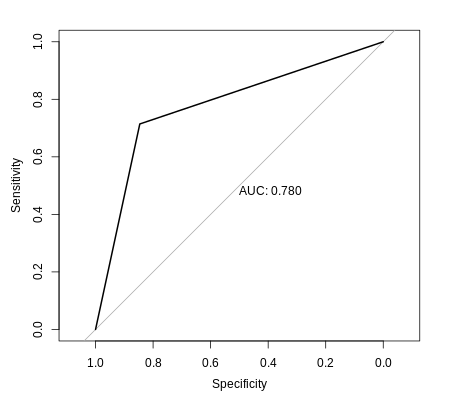

In [37]:
%%R -w 450 -h 400 -u px
# Compute roc
res.roc <- pROC::roc(test$Class_Prob, test$Class_As)
plot.roc(res.roc, print.auc = TRUE)

On a graph, the gray diagonal line represents a classifier's performance that is no better than random chance. In contrast, a high-performing classifier will exhibit a ROC curve that rises steeply towards the top-left corner. This indicates that it can correctly identify a large number of positives without misclassifying many negatives. The AUC metric is commonly used to evaluate the performance of a classifier. An AUC value close to 1, which is the maximum possible value, is indicative of a highly effective classifier. In this case, our classifier exhibits an AUC value of 0.79, suggesting that it is indeed good. By contrast, a classifier that performs no better than random chance would have an AUC value of 0.5 when assessed using an independent test set that was not used for training the model.


In [38]:
%%R
# Extract some interesting results
roc.data <-tibble(
  thresholds = res.roc$thresholds,
  sensitivity = res.roc$sensitivities,
  specificity = res.roc$specificities
)
# Get the probability threshold for specificity = 0.5
roc.data  |>
  filter(specificity >= 0.5)

# A tibble: 2 × 3
  thresholds sensitivity specificity
       <dbl>       <dbl>       <dbl>
1        1.5       0.714       0.846
2      Inf         0           1    


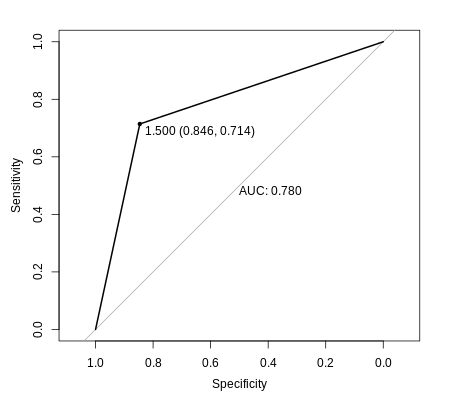

In [39]:
%%R -w 450 -h 400 -u px
plot.roc(res.roc, print.auc = TRUE, print.thres = "best")

##  Summary and Conclusion

The logistic regression tutorial with `r-base`  package provides a comprehensive overview of using logistic regression for binary classification tasks. It covers the theoretical foundation of logistic regression and emphasizes its application in binary classification problems. The tutorial then demonstrates practical implementation steps using R and Caret, including data preprocessing, model building, and performance evaluation. Through hands-on examples, learners gain proficiency in constructing logistic regression models, optimizing them for predictive accuracy, and assessing their performance using metrics such as `ROC curves` and `confusion matrices`. By the end of the tutorial, participants will have a solid understanding of logistic regression in R and the practical skills to apply it effectively in real-world classification scenarios.


## References

1.  [How to Perform Logistic Regression in R](https://www.statology.org/logistic-regression-in-r/)

2.  [Evaluation of Classification Model Accuracy: Essentials](http://www.sthda.com/english/articles/36-classification-methods-essentials/143-evaluation-of-classification-model-accuracy-essentials/)

3. [Precision, Recall and F1-Score using R](https://www.geeksforgeeks.org/precision-recall-and-f1-score-using-r/)

